In [ ]:
# this notebook is to test run the custom stock trading environment

In [1]:
# import custom functions and classes
from curatedataset import makegymenv, run_env

from get_agent import Agent, TradingAlgorithm

/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# make gym environment
stock_name = 'TSLA'
start_date = '2018-01-01'
num_days = 365*4
interval = '1d'

env, obs_space_shape, act_space_shape, obs_features, data = makegymenv(stock_name, start_date, num_days, interval)

[*********************100%***********************]  1 of 1 completed


/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)
/media/victoru/B612CEC512CE8A37/stonkdecisiondocker/stonkdecision/src/curatedataset.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['momentum_stoch_rsi'].iloc[:10] = 0.5
/home/victoru/anaconda3/envs/testpython/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


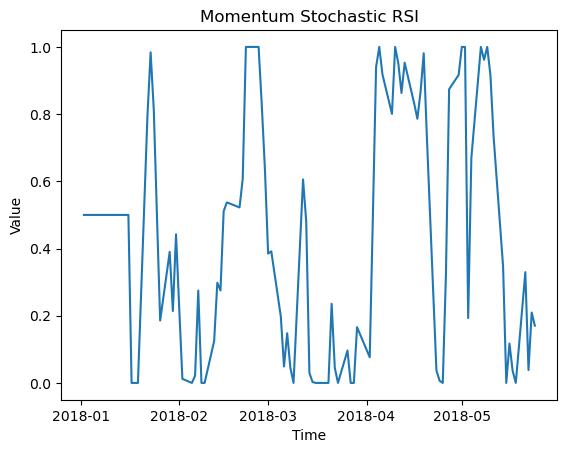

In [3]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# plot the data
ax.plot(data['momentum_stoch_rsi'][0:100])

# set the title and axis labels
ax.set_title('Momentum Stochastic RSI')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# show the plot
plt.show()

In [3]:
print(obs_features)

['Open', 'High', 'Low', 'Close', 'volume_cmf', 'trend_macd', 'momentum_rsi', 'momentum_stoch_rsi', 'Balance', 'Net_worth', 'Shares_held', 'Cost_basis', 'Total_shares_sold', 'Total_sales_value']


In [3]:
agenttype = 'algo'
algotype = 'momentum_stoch_rsi'
# set the trading range as % of balance
trade_range = [0.2, 0.6]
# find the momentum_stoch_rsi position in obs_features
for i in range(len(obs_features)):
    if obs_features[i] == algotype:
        algotype_index = i
        break

tradalgo = TradingAlgorithm(algotype, algotype_index, trade_range)
algoagent = Agent(env, agenttype, algo = tradalgo)

In [7]:
type(env.action_space.sample())

numpy.ndarray

In [4]:
# run the environment
num_episodes = 1
run_env(algoagent, env, num_episodes, normalize = False)

Episode:  0 Timestep: 179  done


{'data': [{'state': [[242.88333129882812,
     249.80332946777344,
     241.53334045410156,
     246.5933380126953,
     0.07516902683221133,
     4.09834693641551,
     58.29512614175564,
     0.8051017138112798,
     20000.0,
     20000.0,
     0.0,
     0.0,
     0.0,
     0.0],
    [239.86666870117188,
     241.8000030517578,
     230.60000610351562,
     238.2100067138672,
     0.04221635021367442,
     3.9933161725313653,
     53.33631730623262,
     0.506652676504732,
     20000.0,
     20000.0,
     0.0,
     0.0,
     0.0,
     0.0],
    [239.13999938964844,
     245.75,
     236.89666748046875,
     239.663330078125,
     0.07674051673305207,
     3.981453863246344,
     54.065794367469515,
     0.40732038918265584,
     20000.0,
     20000.0,
     0.0,
     0.0,
     0.0,
     0.0],
    [234.92333984375,
     248.27999877929688,
     232.6666717529297,
     248.0399932861328,
     0.14641315542809522,
     4.595011183240217,
     58.12874964493943,
     0.6766092077023164,
 